In [4]:
# 必要なライブラリのインクルード
import os
import re
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,  Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np# 元となる画像の読み込み
%matplotlib inline

# 関数定義

In [8]:
# opencv画像入力用
from IPython.display import display, Image

def display_cv_image(image, format='.JPG'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

def readyForGuess(img_nam,width):
    img = cv2.imread( "./img/"+img_name+".jpg", cv2.IMREAD_GRAYSCALE)
    size = (3*width,4*width)
    #Create Small Size Image
    length=size[0]*size[1]
    img = cv2.resize(img, size)
    img_dat = img/255
    img_dat = img_dat.reshape(1,length)
    return img_dat

 # 学習画像入力

In [126]:
#画像読み込みします
width = 60
size = (3*width,4*width)
length=size[0]*size[1]

bef_img = []
aft_img = []

dir = os.getcwd()# カレントディレクトリのパスを取得


#positive
pos_dir = dir+"/img/pos/"
files = os.listdir(pos_dir)# ファイルのリストを取得
for file in files:# ファイルの数だけループ
    index = re.search('.JPG', file)# 拡張子がjpgのものを検出
    if index:# jpgの時だけ
        read_img = cv2.imread( pos_dir+file)
        read_img = cv2.resize(read_img, size)
        read_img = read_img/255
        bef_img.append(read_img)
# #negative
neg_dir = dir+"/img/neg/"
files = os.listdir(neg_dir)# ファイルのリストを取得
for file in files:# ファイルの数だけループ
    index = re.search('.JPG', file)# 拡張子がjpgのものを検出
    if index:# jpgの時だけ
        read_img = cv2.imread( neg_dir+file)
        read_img = cv2.resize(read_img, size)
        read_img = read_img/255
        aft_img.append(read_img)

# arrayに変換
bef_img = np.asarray(bef_img)
aft_img = np.asarray(aft_img)

# モデルの形成

In [127]:
model = Sequential()
model.add(Conv2D(3, (20, 20), padding='same',data_format="channels_last" ,input_shape=(size[1], size[0], 3) ))
model.add(Activation('relu'))

# コンパイル
model.compile(loss='mse',optimizer='SGD',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 240, 180, 3)       3603      
_________________________________________________________________
activation_38 (Activation)   (None, 240, 180, 3)       0         
Total params: 3,603
Trainable params: 3,603
Non-trainable params: 0
_________________________________________________________________


# モデルの学習

In [128]:
# 実行
model.fit(aft_img, bef_img, batch_size=5, epochs=100)

Epoch 1/100
9/9 [==============================] - 2s - loss: 0.3547 - acc: 0.5855     
Epoch 2/100
9/9 [==============================] - 2s - loss: 0.2058 - acc: 0.3832     
Epoch 3/100
9/9 [==============================] - 2s - loss: 0.2204 - acc: 0.3984     
Epoch 4/100
9/9 [==============================] - 2s - loss: 0.2684 - acc: 0.5009     
Epoch 5/100
9/9 [==============================] - 2s - loss: 0.2304 - acc: 0.4037     
Epoch 6/100
9/9 [==============================] - 2s - loss: 0.1814 - acc: 0.5360     
Epoch 7/100
9/9 [==============================] - 2s - loss: 0.2632 - acc: 0.3222     
Epoch 8/100
9/9 [==============================] - 2s - loss: 0.2616 - acc: 0.3001     
Epoch 9/100
9/9 [==============================] - 2s - loss: 0.1828 - acc: 0.4666     
Epoch 10/100
9/9 [==============================] - 2s - loss: 0.2499 - acc: 0.4973     
Epoch 11/100
9/9 [==============================] - 2s - loss: 0.2535 - acc: 0.3545     
Epoch 12/100
9/9 [============

9/9 [==============================] - 2s - loss: 0.2931 - acc: 0.2144     
Epoch 94/100
9/9 [==============================] - 2s - loss: 0.2632 - acc: 0.2308     
Epoch 95/100
9/9 [==============================] - 2s - loss: 0.3051 - acc: 0.2631     
Epoch 96/100
9/9 [==============================] - 2s - loss: 0.2627 - acc: 0.6032     
Epoch 97/100
9/9 [==============================] - 2s - loss: 0.3090 - acc: 0.1411     
Epoch 98/100
9/9 [==============================] - 2s - loss: 0.2583 - acc: 0.3438     
Epoch 99/100
9/9 [==============================] - 2s - loss: 0.2229 - acc: 0.2356     
Epoch 100/100
9/9 [==============================] - 2s - loss: 0.1271 - acc: 0.5501     


In [129]:
hoge = model.predict(aft_img)

上から下への変化を学習


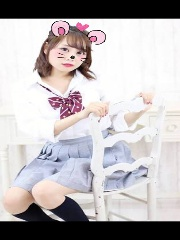

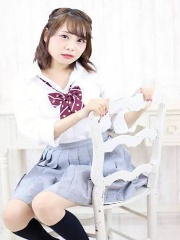

そしたらこうなった


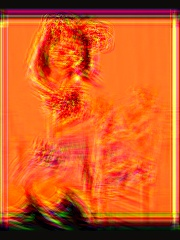

In [136]:
print("上から下への変化を学習")
display_cv_image(aft_img[3]*255),display_cv_image(bef_img[3]*255)
print("そしたらこうなった")
display_cv_image(hoge[3]*255)